# K -nearest Neighs to predict/decide if a course is paid or  lent out for free .

Based on features of a course such as num of published lectures and num of practice tests for a course , the course provider can make a decision based on the vote made with help of its neighbors with similar traits.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

#Required Modules

<font color='blue'>
We know that KNN is computationally expensive because of distance calculations  , hence we limit ourselves with a sample obtained from the population data . For better simulation of results , we'll sample data in such a way that target classes are balanced
</font>

In [2]:
population = pd.read_csv('../Dataset/Development_IT.csv')

In [3]:
population.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'rating', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')

In [4]:
Un_paid = population[population['is_paid']==False].sample(100)
#We'll extract 100 random sample for target class of False

In [5]:
Paid = population[population['is_paid']==True].sample(100)
#100 samples of Paid=True record

In [6]:
#Now we'll append the dataframes to form a new input_dataset
Input_data = Paid.append(Un_paid)
Input_data.head(4)

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
3070,1584250,Introduction to Programming for Beginners,/course/introduction-to-programming-for-beginn...,True,2095,4.12121,4.20010,152,39,0,2018-03-06T22:47:10Z,2018-03-07T22:43:46Z,455.0,8000.0
20609,1627128,Security Analysis and Portfolio Management,/course/securityanalysisportfoliomanagement/,True,2,3.50000,3.50000,2,10,0,2018-04-02T09:18:14Z,2020-05-26T18:36:33Z,455.0,1280.0
30961,1485548,QA Testing: From Zero to Robot Framework,/course/qa-testing-from-zero-to-robot-framework/,True,52,3.75000,3.62497,8,53,0,2017-12-28T18:24:26Z,2019-03-01T22:39:30Z,455.0,6720.0
28775,883304,"Laloux's ""Reinventing Organizations"" for Scrum...",/course/reinventing-organizations/,True,160,4.60000,4.56931,23,27,0,2016-06-20T16:18:01Z,2016-06-26T19:34:49Z,455.0,1280.0


In [7]:
target = Input_data['is_paid']   #dependent
features = Input_data[['num_published_lectures','num_published_practice_tests']] #independent

# Model Building Phase

In [8]:
from sklearn.model_selection import train_test_split  #train-test-split
x_train, x_test, y_train, y_test= train_test_split(features, target , test_size= 0.30, random_state=0)  

In [9]:
#feature scaling is not necessary , as the features are at scale , no huge difference .

<font color='blue'>THE KNN MODEL SETUP</font>

In [10]:
from sklearn.neighbors import KNeighborsClassifier  

KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 

#Neighbors = 5 (we'll take opinion from the top 5)
#Default metric is minkowski , our P -norm
#WE are using p=2 , which implies that is a normal eucliden distance

KNN.fit(x_train, y_train) 
#model is trained

#But KNN is a lazy learner though!

KNeighborsClassifier()

<font color='blue'>
    
Our Hyper-parameters here are

K in K-nearest-neighs = 5

distance_measure = Euclidean

</font>

<font color='blue'>We shall look into the predictions thus made</font>

In [11]:
class_predictions = KNN.predict(x_test)

In [12]:
class_predictions

array([False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False])

<font color='blue'>
Well as of now 

* Our model is fit/trained

* predictions have been made as well!

* Let us visualize the predictions using COnfusion matrix 
</font>

In [13]:
from sklearn.metrics import confusion_matrix  

matrix = confusion_matrix(y_test, class_predictions)

matrix

array([[26,  5],
       [15, 14]], dtype=int64)

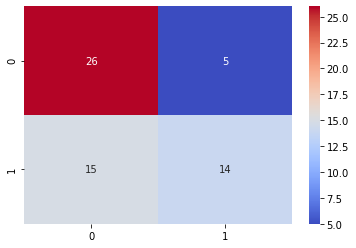

In [14]:
sns.heatmap(matrix,annot=True,cmap='coolwarm')

<b>

That's how the Confusion Matrix looks like

Based on the Confusion Matrix , we can infer few key points

* our model managed to get 40 labels right (i.e TP and TN)
* model has misclassfied 20 samples (i.e FP and FN)


Let us compute the Accuracy of our model.
    
</b>

In [15]:
from sklearn import metrics

# Model Accuracy , it is ok to use accuracy in this case because we have defined an equal split of target variables

print("Accuracy:",metrics.accuracy_score(y_test, class_predictions))

Accuracy: 0.6666666666666666


<font color='blue'>So That's our accuracy for K=5 neighs and Euclidean distance .</font>




<font color='blue'>
What does the accuracy imply ? 

Whenever the course instructor wants to decide to make is course paid or un_paid with our KNN model , he'll end up making correct decisions accuracy% of the times.
</font>

<font color='dark-green'>Can we do better ??

Let us Tweak the value of K in KNN using ELbow Method and we'll change our distance metric</font>

# Elbow method to find optimal K 

In [16]:
error_vals = []

for i in range(1,11):
 
    model = KNeighborsClassifier(n_neighbors=i,metric='minkowski', p=2)
    
    model.fit(x_train,y_train)
 
    pred_i = model.predict(x_test)
     
    error_vals.append(np.mean(pred_i != y_test))

<font color='dark-green'> We shall visualize how the error varies with various k values </font>

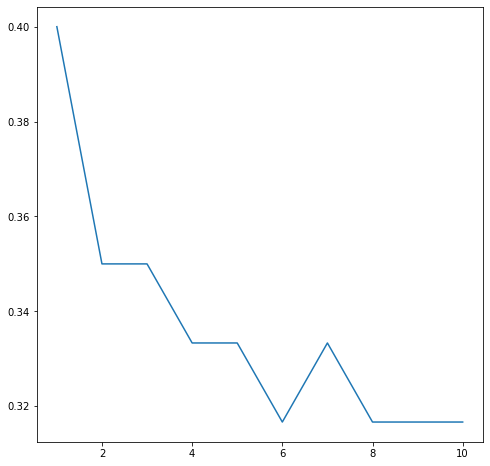

In [17]:
plt.figure(figsize=(8,8))
sns.lineplot(x=range(1,11) , y= error_vals , markers=True , dashes=True )

From the above graph , we can conclusively say that No.of.neighbours = 6 at elbow , this may vary for different runs , because the dataset used for KNN here is small and randomness is  introduced via train_test_splits

Concluding points :
    
    * we saw how the values of num_published_lectures and num_practice_tests for a given course can help the instructor to     decide the mode in which a course must be available. 
    
    * KNN binary-classifier has been used to model the above problem , with confusion matrices and accuracy used for metrics visualization
    
    *Elbow method is used to find the best value of KNN .